In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
from glob import glob

In [3]:
import pandas as pd

In [4]:
#dataset_path = '/media/steve/Data2/unsplash-dataset/unsplashed-resized/'
dataset_path = '/media/steve/Data2/unsplash-dataset/unsplash-original/'
photos = pd.read_csv('../../../dataset/dataset.csv')

In [5]:
photos['photo_id'].loc[photos['orientation']==0]

12       rDLBArZUl1c
30       iuZ_D1eoq9k
67       xJqXTBt95tA
87       mYXXokN8HZ0
88       2KXEb_8G5vo
            ...     
25299    ypibB9C-W2E
25300    ypl5fG5fZsM
25304    kVwPcYo1Z3I
25305    5zWj7K_QVos
25307    IOkL3ZqAapM
Name: photo_id, Length: 11797, dtype: object

In [6]:
#write_path = '/media/steve/Data2/unsplash-dataset/unsplashed-3:2/'
write_path = '/media/steve/Data2/unsplash-dataset/unsplash-square/'

In [7]:
full_ids = photos['photo_id']
horizontal_ids = photos['photo_id'].loc[photos['orientation']==1].values

In [8]:
full_ids_paths = dataset_path + full_ids + '.jpg'
horizontal_ids_paths = dataset_path + horizontal_ids + '.jpg'

In [9]:
write_ids = write_path + full_ids + '.jpg'

In [10]:
target_ratio_x = 300
target_ratio_y = 200

/media/steve/Data2/unsplash-dataset/unsplash-original/12dXKDujs40.jpg
(2848, 3662)->(233, 300)
crop
16
(200, 300, 3)


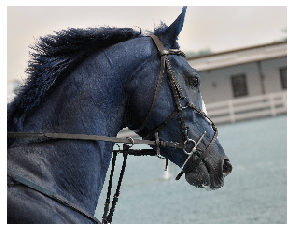

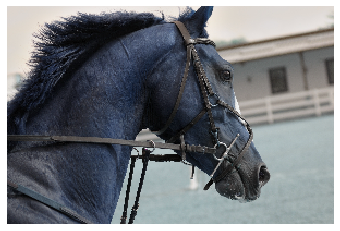

In [15]:
images = []
# 13 -> crop
# 17 -> 0pad
for i, im_name in enumerate(full_ids_paths[10:11]):
    print(im_name)
    im = cv2.imread(im_name)
  
    
    old_size  = im.shape[:2]
    
    ratio = float(target_ratio_x) / max(old_size)

    new_size = tuple(int(x*ratio) for x in old_size)
    print("%s->%s" % (str(old_size), str(new_size)))
    #new_image = cv2.cvtColor(cv2.resize(im,(new_size[1],new_size[0])), cv2.COLOR_BGR2RGB)
    new_image = cv2.resize(im,(new_size[1],new_size[0]))

    plt.figure(0)
    plt.axis('off')        
    plt.imshow(new_image)     
    
    # y axis
    if new_image.shape[0] > target_ratio_y: # 3:2 aspect ratio
        print("crop")
        num_rows_to_crop = new_image.shape[0]-target_ratio_y
        overlap = int(num_rows_to_crop/2)
        print(overlap)
        if num_rows_to_crop % 2 == 0:
            print(new_image[overlap:new_image.shape[0]-overlap].shape)
            new_image = new_image[overlap:new_image.shape[0]-overlap]
        else:
            new_image = new_image[overlap+1:new_image.shape[0]-overlap]


    elif new_image.shape[0] < target_ratio_y:
        print("0pad")
        num_pixels_to_pad = target_ratio_y-new_image.shape[0]
        overlap = int(num_pixels_to_pad/2)
        if num_pixels_to_pad % 2 == 0:
            new_image = cv2.copyMakeBorder(new_image, overlap, overlap, 0, 0, cv2.BORDER_CONSTANT, value=[0,0,0])
        else:
            new_image = cv2.copyMakeBorder(new_image, overlap+1, overlap, 0, 0, cv2.BORDER_CONSTANT, value=[0,0,0])
            
            
    ## x axis
    if new_image.shape[1] > target_ratio_x: # 3:2 aspect ratio
        print("crop")
        num_rows_to_crop = new_image.shape[1]-target_ratio_x
        overlap = int(num_rows_to_crop/2)
        if num_rows_to_crop % 2 == 0:
            new_image =new_image[new_image.shape[1]-overlap:overlap]
        else:
            new_image =new_image[new_image.shape[1]-overlap:overlap+1]


    elif new_image.shape[1] < target_ratio_x:
        print("0pad")
        num_pixels_to_pad = target_ratio_x-new_image.shape[1]
        overlap = int(num_pixels_to_pad/2)
        print(num_pixels_to_pad)
        if num_pixels_to_pad % 2 == 0:
            new_image = cv2.copyMakeBorder(new_image, 0, 0, overlap, overlap, cv2.BORDER_CONSTANT, value=[0,0,0])
        else:
            new_image = cv2.copyMakeBorder(new_image, 0, 0, overlap, overlap+1, cv2.BORDER_CONSTANT, value=[0,0,0])
            
            
    plt.figure(1)
    plt.axis('off')        
    plt.imshow(new_image)             
    print(new_image.shape)
    #print(write_ids[i])
    break
    #cv2.imwrite(write_ids[i],new_image)
    #cv2.imwrite(write_ids,new_image)
        


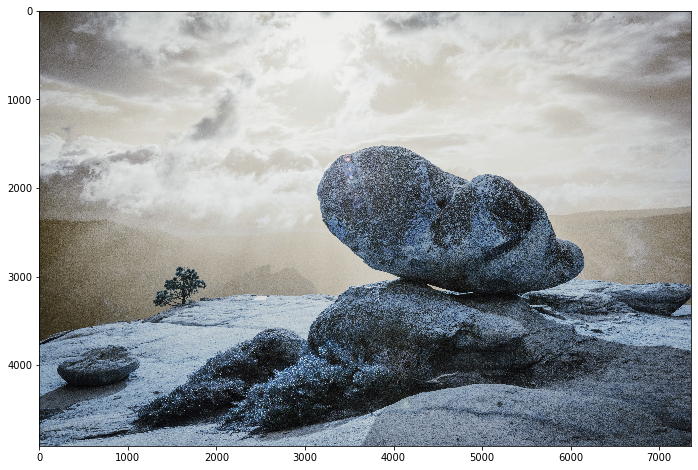

In [8]:
im = cv2.imread(dataset_path+'/ctWw2S9VqOI.jpg')
plt.figure(figsize=(20,8))
plt.imshow(im)